
The total number of distinct quantum distributions that can be formed by arranging a quantity $M$ in $n$ distinct cells is ${M - 1}\choose{M - n}$.

----

The total number of distinct ordered distributions that can be formed by arranging a quantity of $M$  in $n$ cells equals the number of partitions of the integer $M$ for representing it as a sum of $n$ integer addends.
<br><br>
The number of partitions of an integer $x$ for representing it as a sum of $y$ addends, which value can not be 0, can be obtained by the recursive formula $p_y(x) = p_y(x - y) + p_{y-1}(x - 1)$, with $p_y(x) = 0$ if $y>x$ and $p_y(0) = 0$ .
Thus, we can use the formula to evaluate the number of ordered distributions by setting $x = M$, because it is the total arranged quantity, and $y = n$, because we want to represent such an integer as a sum of exactly $n$ non-zero addends (namely, non-empty cells).
<br>
An alternative formula for calculating the partitions of an integer, which allows for zero-valued addends, is $S_{x,y} = S_{x,y-1} + S_{x-y,y}$ with $S_{x,1} = 1$, $S_{0,0}=1$, $S_{x,y}= 0$ for $x<0$ or $y<0$. Since, this alternative formula allows for zero-valued addends, the number of ordered distributions can be obtained by distributing the quantity $M-n$ to the $n$ cells, thus by setting $x = M-n$ and $y = n$. 


In [17]:
#15, 5

nof_dots = 15
nof_cells = 5

nof_available_dots = nof_dots - nof_cells


def generate_distributions(nof_dots, nof_cells):
    
    nof_available_dots = nof_dots - nof_cells

    available_dots = [ 0 for i in range(nof_cells) ]
    available_dots[0]  = nof_available_dots

    cells = [0 for i in range(nof_cells)]

    distributions = list()
    def generate(i):
        if i == nof_cells - 1:
            cells[i] = available_dots[i]
            distributions.append([i+1 for i in cells])
            cells[i] = 0
        else:
            for d in range(available_dots[i]+1):
                cells[i] = d
                available_dots[i+1] = available_dots[i] - d
                generate(i+1)
    generate(0)

    #print(distributions)

    #print('total number of distributions: ', len(distributions))

    #print('-'*40)

    tmp_ordered_distributions = set()
    for d in distributions:
        #tmp_ordered_distributions.add( '-'.join([ str(s) for s in sorted(d)]) )
        tmp_ordered_distributions.add( tuple(sorted(d)) )
    ordered_distributions = list()
    for d in sorted(tmp_ordered_distributions):
        #ordered_distributions.append( [ int(x) for x in d.split('-') ] )
        ordered_distributions.append( [ int(x) for x in d ] )

    #print(ordered_distributions)
    #print('number of ordered distributions:', len(ordered_distributions))
    #print('-'*40)
    
    return distributions, ordered_distributions

import math
def calculate_kl(d1, d2):
    s = sum(d1)
    k = 0.0
    for i in range(len(d1)):
        #k += (d1[i]/s) * math.log( (d1[i]/s)/( d2[i]/s), 2 )
        k += (d1[i]/s) * math.log( (d1[i]/d2[i]), 2 )
    return k

distributions, ordered_distributions = generate_distributions(nof_dots, nof_cells)

print('total number of distributions: ', len(distributions))
print('-'*40)
print('number of ordered distributions:', len(ordered_distributions))
print('-'*40)

#print(distributions)

for d in ordered_distributions:
    max_kl = 0.0
    max_d = []
    for d2 in distributions:
        kl = calculate_kl(d,d2)
        if kl > max_kl:
            max_kl = kl
            max_d = d2
    if (nof_available_dots+1) not in max_d:
        print('WRONG', d, max_d, max_kl)
        
print('-'*40)



total number of distributions:  1001
----------------------------------------
number of ordered distributions: 30
----------------------------------------
----------------------------------------


In [18]:
nof_dots = 15
nof_cells = 5

import math
def integer_partitions(n, k):
    if k==1:
        return 1
    if n==0 and k == 0:
        return 1
    if k< 0 or n < 0:
        return 0
    return integer_partitions(n, k-1) + integer_partitions(n-k, k)


def integer_partitions2(k, n):
    if k == 1:
        return 1
    if n == 0:
        return 0
    if k > n:
        return 0
    return integer_partitions2(k, n-k) + integer_partitions2(k-1,n-1)

def nof_surjectives(n,k):
    return math.factorial(n) / (  math.factorial(k) * math.factorial(n-k) )


print('number of cells: ', nof_cells)
print('number of dots:', nof_dots)

print('expected unordered distributions:', nof_surjectives(nof_dots -1 , nof_dots - nof_cells))
print('exprected ordered distributions:', integer_partitions(nof_dots - nof_cells, nof_cells))
print('exprected ordered distributions:', integer_partitions2(nof_cells, nof_dots))

number of cells:  5
number of dots: 15
expected unordered distributions: 1001.0
exprected ordered distributions: 30
exprected ordered distributions: 30


In [19]:
import matplotlib.pyplot as plt
from scipy import stats

def calculate_jaccard(d1, d2):
    num = 0
    den = 0
    for i in range(len(d1)):
        num += min(d1[i], d2[i])
        den += max(d1[i], d2[i])
    return num/den

def calculate_jensen(d1, d2):
    s = sum(d1)
    k1 = 0.0
    for i in range(len(d1)):
        k1 += (d1[i]/s) * math.log(  (2 * d1[i]) / ( d1[i] + d2[i] )  , 2 )
    k2 = 0.0
    for i in range(len(d1)):
        k2 += (d2[i]/s) * math.log(  (2 * d2[i]) / ( d2[i] + d1[i] )  , 2 )
    return (k1 + k2)/2.0

def calculate_hellinger(d1, d2):
    s = sum(d1)
    r = 0.0
    for i in range(len(d1)):
        r += math.sqrt( (d1[i]/s) * (d2[i]/s) )
    return 1.0 - r
    

x = list()
y = list()
klto = list()
simkl = list()
jens = list()
hel = list()

for i1 in range(len(distributions)):
    d1 = distributions[i1]
    maxd = [1 for x in range(len(d1))]
    i = d1.index(min(d1))
    maxd[i] = nof_available_dots
    for i2 in range(len(distributions)):
        d2 = distributions[i2]
        x.append( calculate_kl(d1,d2) / calculate_kl(d1, maxd))
        y.append( 1.0 - calculate_jaccard(d1,d2) )
        klto.append(calculate_kl(d1,d2))
        simkl.append( (calculate_kl(d1,d2)/2)+( calculate_kl(d2,d1)) / 2 )
        jens.append( calculate_jensen(d1, d2))
        hel.append(calculate_hellinger(d1, d2))

        
print('-'*40)
#plt.scatter(x,y, marker='x')
#plt.xlabel('Kullbak-Leibler')
#plt.ylabel('Generalized Jaccard')

import scipy

print(scipy.stats.pearsonr(x,y))
print(scipy.stats.pearsonr(x,klto))
print(scipy.stats.pearsonr(x,simkl))
print(scipy.stats.pearsonr(x,jens))
print(scipy.stats.pearsonr(x,hel))

----------------------------------------
PearsonRResult(statistic=0.9085519985794662, pvalue=0.0)
PearsonRResult(statistic=0.972383694056818, pvalue=0.0)
PearsonRResult(statistic=0.9616880736612461, pvalue=0.0)
PearsonRResult(statistic=0.9642036104927594, pvalue=0.0)
PearsonRResult(statistic=0.9633358915776434, pvalue=0.0)


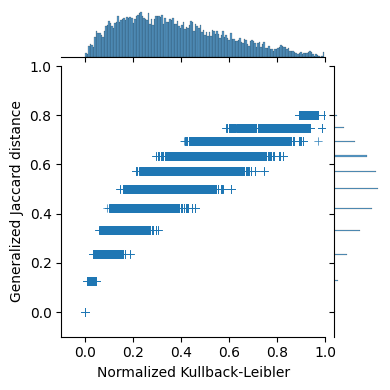

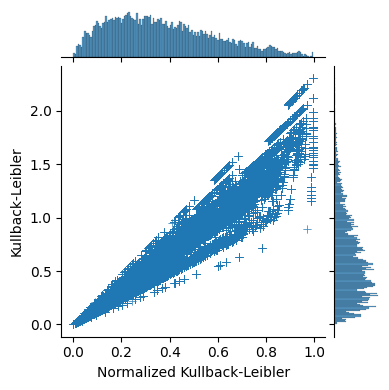

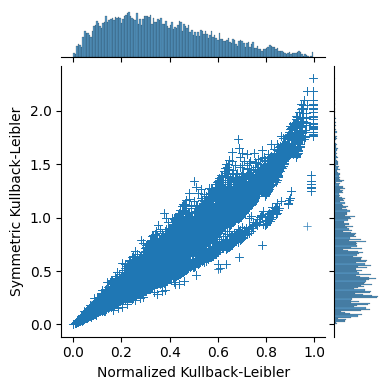

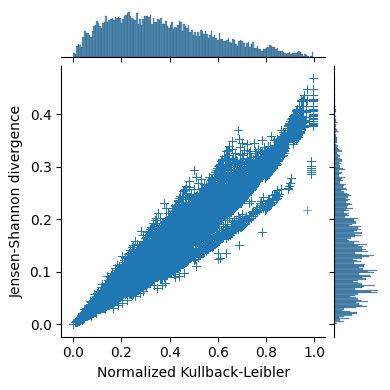

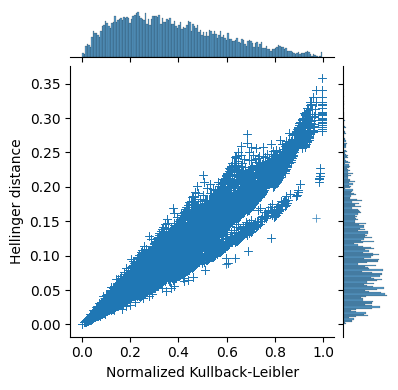

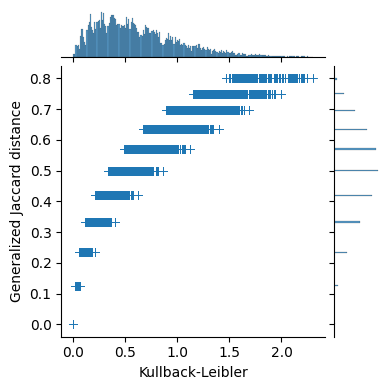

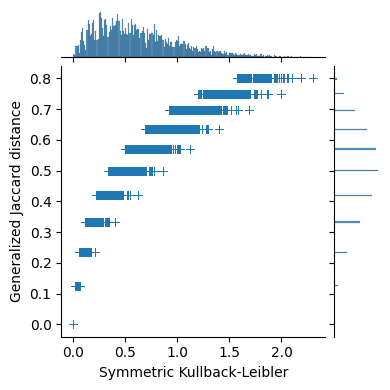

In [20]:
import seaborn as sns
import pandas

df = pandas.DataFrame()
df['Normalized Kullback-Leibler'] = x
df['Generalized Jaccard distance'] = y
sns.jointplot(x='Normalized Kullback-Leibler', y='Generalized Jaccard distance', data=df, kind='scatter', marker='+', alpha=0.3, height=4,
                  xlim=(-0.1,1), ylim=(-0.1,1))
plt.savefig('nkl_gj_15_5.png')

df['Kullback-Leibler'] = klto
df['Symmetric Kullback-Leibler'] = simkl
df['Jensen-Shannon divergence'] = jens
df['Hellinger distance'] = hel


sns.jointplot(x='Normalized Kullback-Leibler', y='Kullback-Leibler', data=df, kind='scatter', marker='+', alpha=0.3, height=4)
plt.savefig('nkl_kl_15_5.png')
sns.jointplot(x='Normalized Kullback-Leibler', y='Symmetric Kullback-Leibler', data=df, kind='scatter', marker='+', alpha=0.3, height=4)
plt.savefig('nkl_skl_15_5.png')
sns.jointplot(x='Normalized Kullback-Leibler', y='Jensen-Shannon divergence', data=df, kind='scatter', marker='+', alpha=0.3, height=4)
plt.savefig('nkl_jens_15_5.png')
sns.jointplot(x='Normalized Kullback-Leibler', y='Hellinger distance', data=df, kind='scatter', marker='+', alpha=0.3, height=4)
plt.savefig('nkl_hel_15_5.png')


sns.jointplot(x='Kullback-Leibler',  y='Generalized Jaccard distance',  data=df, kind='scatter', marker='+', alpha=0.3, height=4)
plt.savefig('kl_gj_15_5.png')
sns.jointplot(x='Symmetric Kullback-Leibler',  y='Generalized Jaccard distance',  data=df, kind='scatter', marker='+', alpha=0.3, height=4)
plt.savefig('skl_gj-15_5.png')

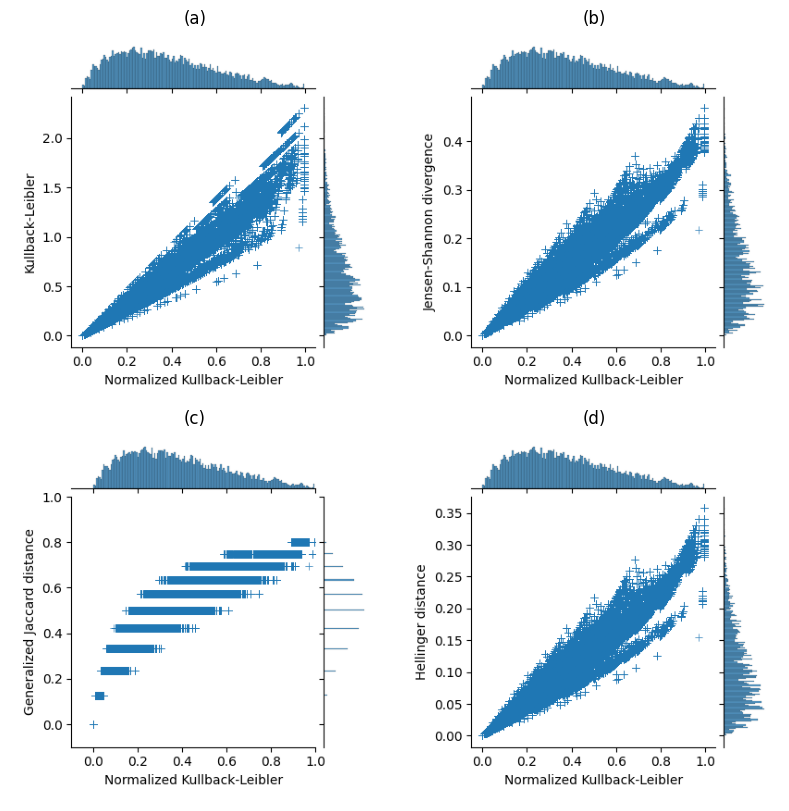

In [12]:
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 2,  figsize=(8,8), sharex=True, sharey=False, constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
axes[0,0].set_frame_on(False)
axes[0,1].set_frame_on(False)
axes[1,0].set_frame_on(False)
axes[1,1].set_frame_on(False)
axes[0,0].imshow(mpimg.imread('nkl_kl_15_5.png'))
axes[0,1].imshow(mpimg.imread('nkl_jens_15_5.png'))
axes[1,0].imshow(mpimg.imread('nkl_gj_15_5.png'))
axes[1,1].imshow(mpimg.imread('nkl_hel_15_5.png'))

axes[0,0].set_title('(a)')
axes[0,1].set_title('(b)')
axes[1,0].set_title('(c)')
axes[1,1].set_title('(d)')
#ax1[0].set_title('(a)')
#ax1[1].set_title('(b)')
#ax2[0].set_title('(c)')
#ax2[1].set_title('(d)')

plt.savefig('exp1.png', dpi=600)

In [13]:
print('Kullback-Leibler')

sx = sorted(x)
dx = [ sx[0] ]
for i in range(1,len(sx)):
    if sx[i] != sx[i-1]:
        dx.append(sx[i])
        
ddx = [ dx[i] - dx[i-1] for i in range(1, len(dx)) ]

print(len(dx),len(ddx))

import statistics
print(statistics.mean(dx), statistics.stdev(dx))
print(statistics.mean(ddx), statistics.stdev(ddx))

Kullback-Leibler
18970 18969
0.36336161161834674 0.22065673662401644
5.250888253549898e-05 0.00017187318222218706


In [14]:
print('Generalized Jaccard')

sy = sorted(y)
dy = [ sy[0] ]
for i in range(1,len(sy)):
    if sy[i] != sy[i-1]:
        dy.append(sy[i])
        
ddy = [ dy[i] - dy[i-1] for i in range(1, len(dy)) ]

print(len(dy),len(ddy))

import statistics
print(statistics.mean(dy), statistics.stdev(dy))
print(statistics.mean(ddy), statistics.stdev(ddy))

Generalized Jaccard
11 10
0.46073858766041736 0.2631017827226358
0.08 0.02498057650969086


total number of distributions:  2629575
----------------------------------------
number of ordered distributions: 919
----------------------------------------
[4, 4, 4, 4, 4, 4, 4, 4]
=0 [7, 7, 7, 7, 1, 1, 1, 1] 0.0
=0 [7, 7, 7, 6, 2, 1, 1, 1] 0.0
=0 [7, 7, 7, 5, 3, 1, 1, 1] 0.0
<0 [7, 7, 6, 6, 3, 1, 1, 1] -0.08553337321327789
=0 [7, 7, 7, 4, 4, 1, 1, 1] 0.0
=0 [8, 6, 6, 5, 4, 1, 1, 1] 0.0
<0 [7, 7, 6, 5, 4, 1, 1, 1] -0.144
<0 [7, 6, 6, 6, 4, 1, 1, 1] -0.2551551815399144
<0 [8, 6, 5, 5, 5, 1, 1, 1] -0.048
<0 [7, 7, 5, 5, 5, 1, 1, 1] -0.2041241452319315
<0 [7, 6, 6, 5, 5, 1, 1, 1] -0.3263703872197692
<0 [6, 6, 6, 6, 5, 1, 1, 1] -0.4651651993213319
=0 [7, 7, 6, 6, 2, 2, 1, 1] 0.0
=0 [7, 7, 6, 5, 3, 2, 1, 1] 0.0
<0 [7, 6, 6, 6, 3, 2, 1, 1] -0.11629129983033297
=0 [7, 7, 6, 4, 4, 2, 1, 1] 0.0
<0 [7, 7, 5, 5, 4, 2, 1, 1] -0.062347968638854966
<0 [7, 6, 6, 5, 4, 2, 1, 1] -0.20124611797498107
<0 [6, 6, 6, 6, 4, 2, 1, 1] -0.36223536926930805
<0 [7, 6, 5, 5, 5, 2, 1, 1] -0.28978829541544643
<0 

/tmp/ipykernel_1345/3753535716.py:45: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew.append(scipy.stats.skew( d ))
/tmp/ipykernel_1345/3753535716.py:47: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if scipy.stats.skew( d ) < 0 :
/tmp/ipykernel_1345/3753535716.py:50: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if scipy.stats.skew( d ) ==0 :
/tmp/ipykernel_1345/3753535716.py:53: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt.append(scipy.stats.kurtosis( d ))


Coefficient of variation Generalized Jaccard distance
Coefficient of variation Kullback-Leibler
Coefficient of variation Jensen-Shannon divergence
Coefficient of variation Hellinger distance
Entropy Normalized Kullback-Leibler
Entropy Generalized Jaccard distance
Entropy Kullback-Leibler
Entropy Jensen-Shannon divergence
Entropy Hellinger distance
Skewness Normalized Kullback-Leibler
Skewness Generalized Jaccard distance
Skewness Kullback-Leibler
Skewness Jensen-Shannon divergence
Skewness Hellinger distance
Kurtosis Normalized Kullback-Leibler
Kurtosis Generalized Jaccard distance
Kurtosis Kullback-Leibler
Kurtosis Jensen-Shannon divergence
Kurtosis Hellinger distance


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1696: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


<Figure size 400x400 with 0 Axes>

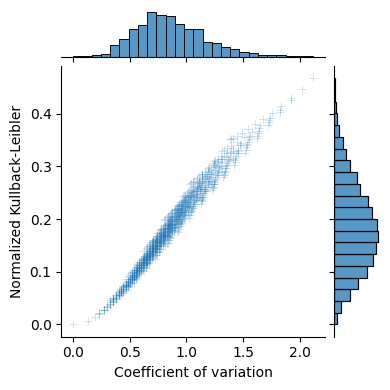

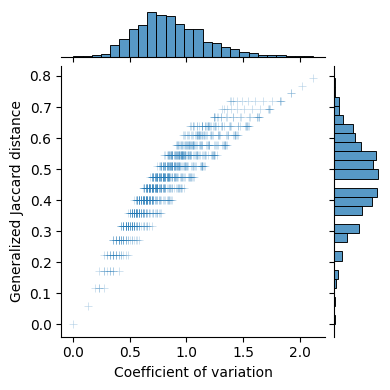

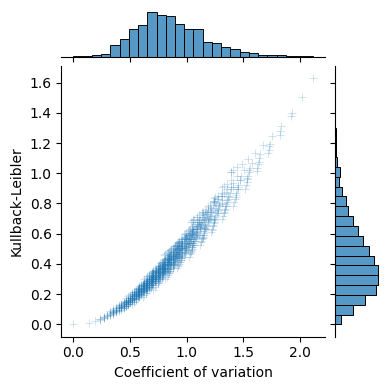

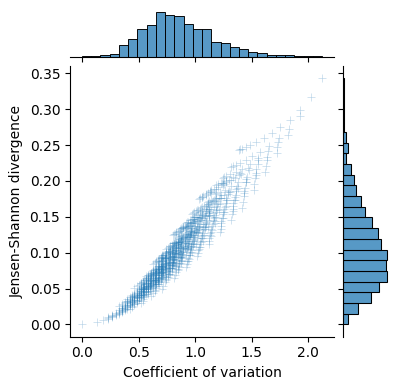

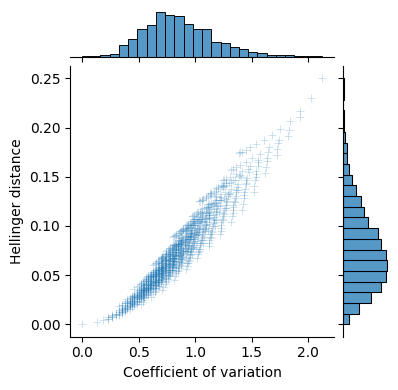

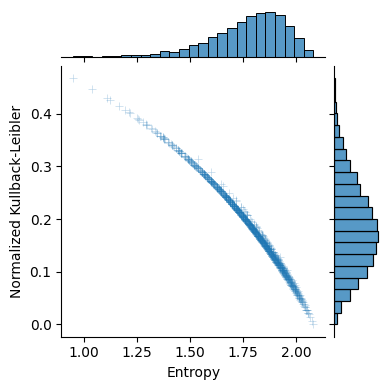

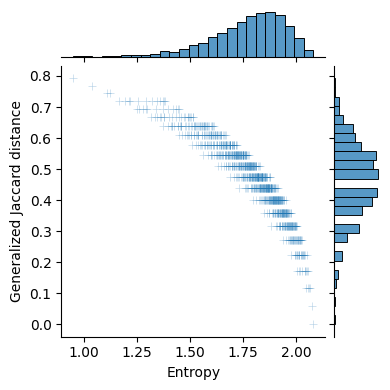

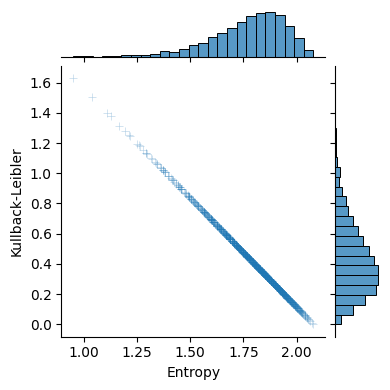

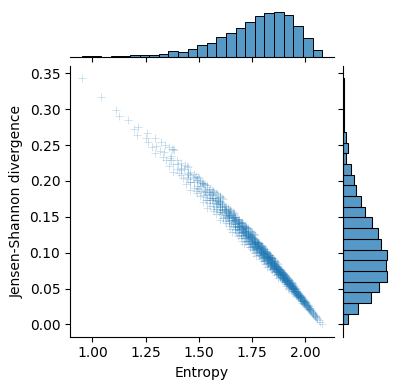

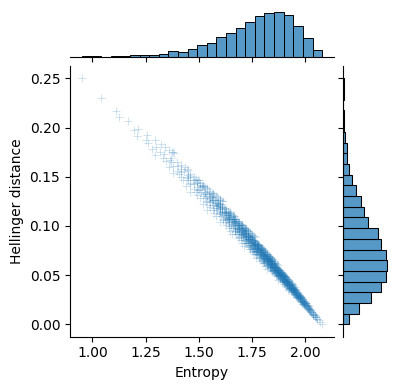

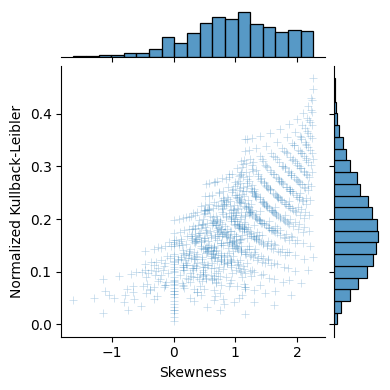

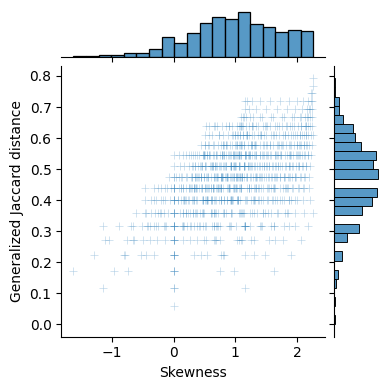

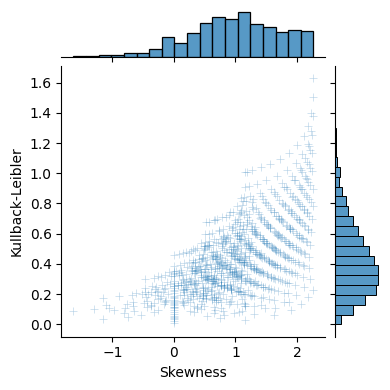

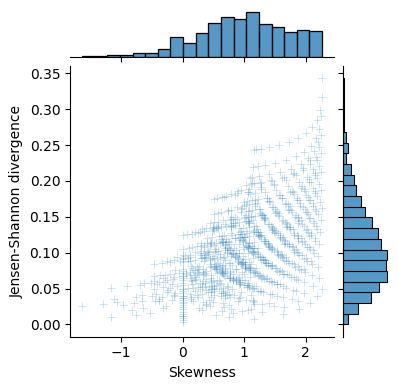

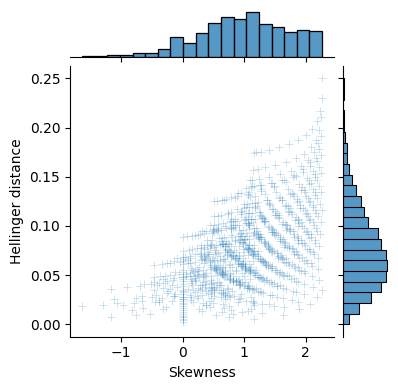

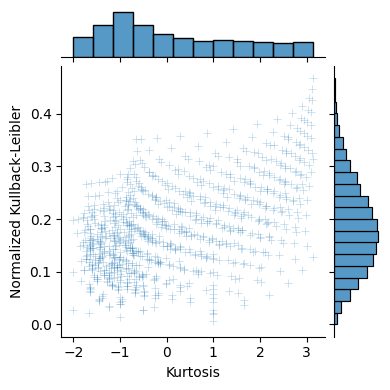

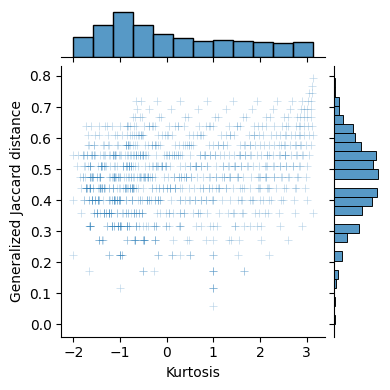

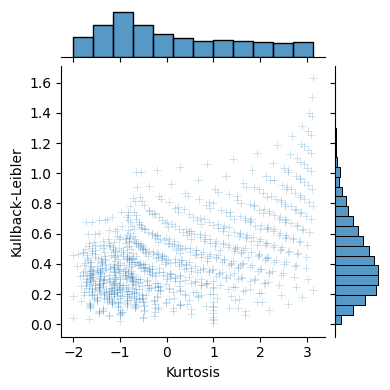

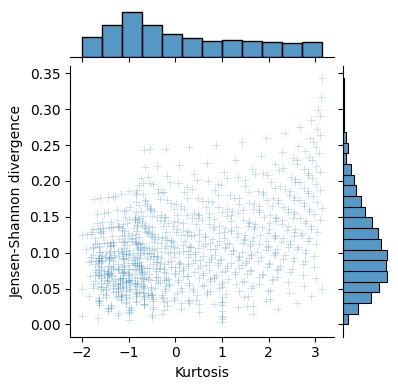

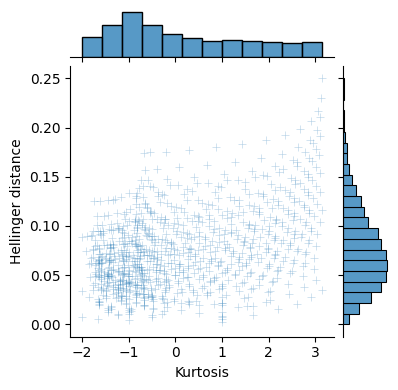

In [22]:
import math
def calculate_entropy(d):
    s = sum(d)
    e = 0.0
    for i in range(len(d)):
        e += (d[i]/s) * math.log( (d[i]/s) )
    return -e


nof_dots = 32
nof_cells = 8
#nof_cells = 6
nof_available_dots = nof_dots - nof_cells
distributions, ordered_distributions = generate_distributions(nof_dots, nof_cells)

print('total number of distributions: ', len(distributions))
print('-'*40)
print('number of ordered distributions:', len(ordered_distributions))
print('-'*40)

import statistics

skew = []
kurt = []
vcoef =[]
gj = []
nk = []
ukl = []
skl = []
en = []
jens = []
hel = []

flat_d = sorted(ordered_distributions, reverse=True)[0]
print(flat_d)

for d in ordered_distributions:
    d = sorted(d, reverse=True)
    #print(d)
    
    maxd = [1 for x in range(len(d))]
    i = d.index(min(d))
    maxd[i] = nof_available_dots
    
    skew.append(scipy.stats.skew( d ))
    
    if scipy.stats.skew( d ) < 0 :
        print('<0', d, scipy.stats.skew( d ))
        
    if scipy.stats.skew( d ) ==0 :
        print('=0', d, scipy.stats.skew( d ))
    
    kurt.append(scipy.stats.kurtosis( d ))
    vcoef.append(statistics.stdev(d)/statistics.mean(d))
    
    nk.append( calculate_kl(d,flat_d) / calculate_kl(d, maxd))
    gj.append( 1.0 - calculate_jaccard(d,flat_d) )
    ukl.append( calculate_kl(d,flat_d) )
    skl.append( (calculate_kl(d,flat_d) + calculate_kl(flat_d,d))/2  )
    en.append(calculate_entropy(d))
    jens.append(calculate_jensen(d, flat_d))
    hel.append(calculate_hellinger(d, flat_d))
    

    
df = pandas.DataFrame()
df['Skewness'] = skew
df['Kurtosis'] = kurt
df['Coefficient of variation'] = vcoef
df['Generalized Jaccard distance'] = gj
df['Normalized Kullback-Leibler'] = nk
df['Kullback-Leibler'] = ukl
df['Symmetric Kullback-Leibler'] = skl
df['Entropy'] = en
df['Jensen-Shannon divergence'] = jens
df['Hellinger distance'] = hel


plt.figure(figsize=(4, 4))

short_d = {'Normalized Kullback-Leibler' : 'nkl',
         'Generalized Jaccard distance' : 'gjd',
         'Kullback-Leibler': 'kl',
         'Jensen-Shannon divergence' : 'jsd',
         'Hellinger distance' : 'hel'
        }
short_m = {'Coefficient of variation' : 'cv',
           'Entropy' : 'en',
           'Skewness' : 'sk',
           'Kurtosis' : 'ku'
        }

for m in short_m.keys():
    for d in short_d.keys():
        print(m,d)
        sns.jointplot(y=d, x=m, data=df, kind='scatter', marker='+', alpha=0.3, height=4)#, xlim=(-0.1,1), ylim=(-0.1,1))
        plt.savefig(short_m[m] +'_'+ short_d[d] +'_'+ str(nof_dots) +'_'+ str(nof_cells)+'.png')


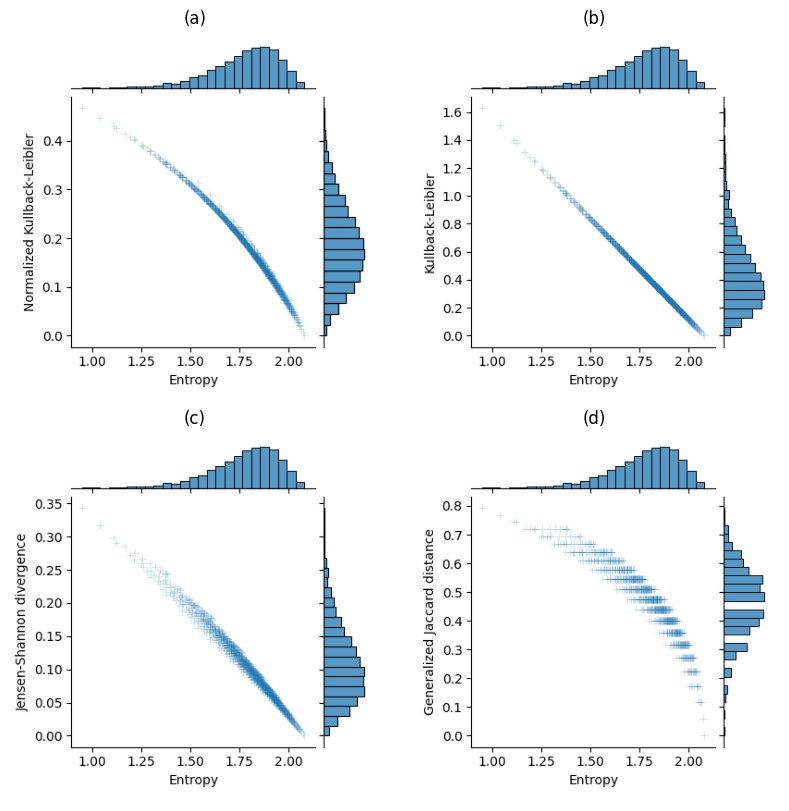

In [36]:
import matplotlib.image as mpimg

fig, axes = plt.subplots(2, 2,  figsize=(8,8), sharex=True, sharey=False, constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
axes[0,0].set_frame_on(False)
axes[0,1].set_frame_on(False)
axes[1,0].set_frame_on(False)
axes[1,1].set_frame_on(False)
axes[0,0].imshow(mpimg.imread('en_nkl_32_8.png'))
axes[0,1].imshow(mpimg.imread('en_kl_32_8.png'))
axes[1,0].imshow(mpimg.imread('en_jsd_32_8.png'))
axes[1,1].imshow(mpimg.imread('en_gjd_32_8.png'))

axes[0,0].set_title('(a)')
axes[0,1].set_title('(b)')
axes[1,0].set_title('(c)')
axes[1,1].set_title('(d)')

plt.savefig('exp2.png', dpi=600)

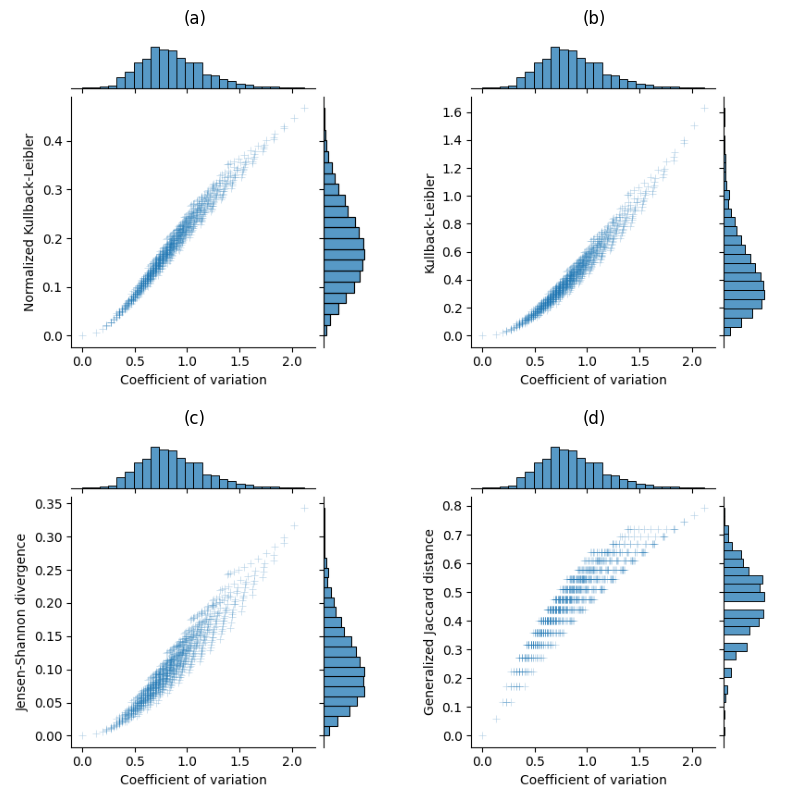

In [24]:
fig, axes = plt.subplots(2, 2,  figsize=(8,8), sharex=True, sharey=False, constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
axes[0,0].set_frame_on(False)
axes[0,1].set_frame_on(False)
axes[1,0].set_frame_on(False)
axes[1,1].set_frame_on(False)
axes[0,0].imshow(mpimg.imread('cv_nkl_32_8.png'))
axes[0,1].imshow(mpimg.imread('cv_kl_32_8.png'))
axes[1,0].imshow(mpimg.imread('cv_jsd_32_8.png'))
axes[1,1].imshow(mpimg.imread('cv_gjd_32_8.png'))

axes[0,0].set_title('(a)')
axes[0,1].set_title('(b)')
axes[1,0].set_title('(c)')
axes[1,1].set_title('(d)')

plt.savefig('exp3.png', dpi=600)

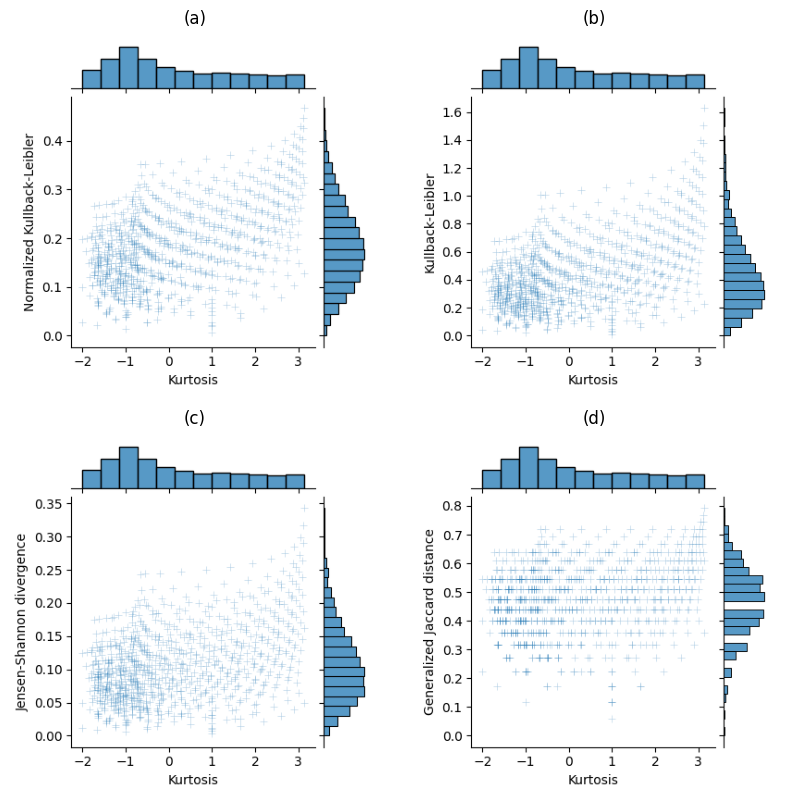

In [25]:
fig, axes = plt.subplots(2, 2,  figsize=(8,8), sharex=True, sharey=False, constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
axes[0,0].set_frame_on(False)
axes[0,1].set_frame_on(False)
axes[1,0].set_frame_on(False)
axes[1,1].set_frame_on(False)
axes[0,0].imshow(mpimg.imread('ku_nkl_32_8.png'))
axes[0,1].imshow(mpimg.imread('ku_kl_32_8.png'))
axes[1,0].imshow(mpimg.imread('ku_jsd_32_8.png'))
axes[1,1].imshow(mpimg.imread('ku_gjd_32_8.png'))

axes[0,0].set_title('(a)')
axes[0,1].set_title('(b)')
axes[1,0].set_title('(c)')
axes[1,1].set_title('(d)')

plt.savefig('exp4.png', dpi=600)

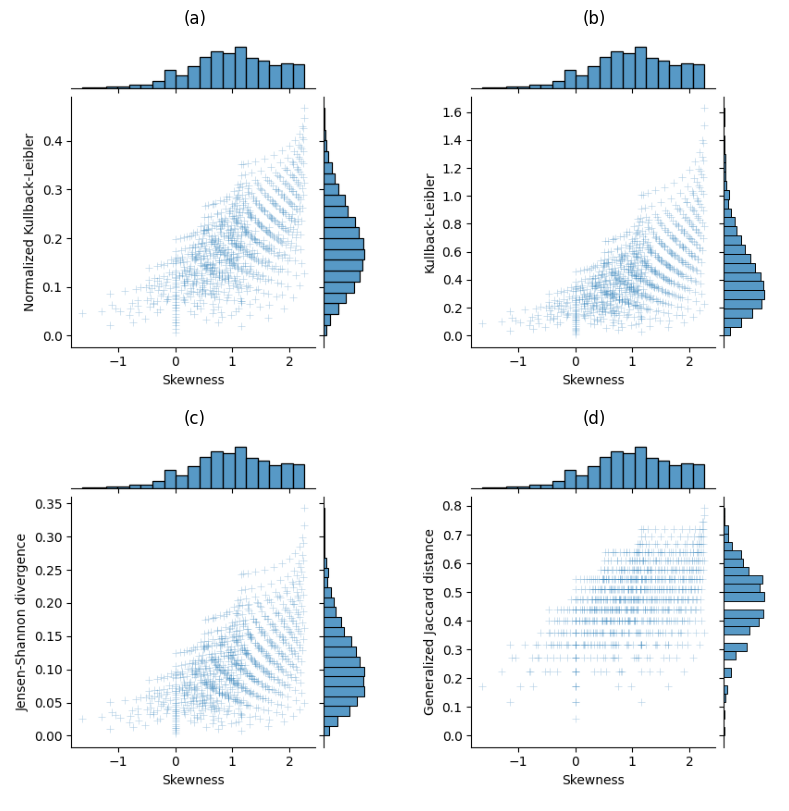

In [26]:
fig, axes = plt.subplots(2, 2,  figsize=(8,8), sharex=True, sharey=False, constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
axes[0,0].set_frame_on(False)
axes[0,1].set_frame_on(False)
axes[1,0].set_frame_on(False)
axes[1,1].set_frame_on(False)
axes[0,0].imshow(mpimg.imread('sk_nkl_32_8.png'))
axes[0,1].imshow(mpimg.imread('sk_kl_32_8.png'))
axes[1,0].imshow(mpimg.imread('sk_jsd_32_8.png'))
axes[1,1].imshow(mpimg.imread('sk_gjd_32_8.png'))

axes[0,0].set_title('(a)')
axes[0,1].set_title('(b)')
axes[1,0].set_title('(c)')
axes[1,1].set_title('(d)')

plt.savefig('exp5.png', dpi=600)

In [27]:
print('Pearson')
ll = ['Normalized Kullback-Leibler', 'Kullback-Leibler', 'Jensen-Shannon divergence', 'Generalized Jaccard distance', 'Hellinger distance']
for a in ll:
    for b in ll:
        if a > b:
            print(a,b, "%6.4f"%scipy.stats.pearsonr(df[a],df[b])[0], sep='\t&\t')
            
print('-'*40)
print('Spearmann')
ll = ['Normalized Kullback-Leibler', 'Kullback-Leibler', 'Jensen-Shannon divergence', 'Generalized Jaccard distance', 'Hellinger distance']
for a in ll:
    for b in ll:
        if a > b:
            print(a,b, "%6.4f"%scipy.stats.spearmanr(df[a],df[b])[0], sep='\t&\t')
            
print('-'*40)
ll = ['Normalized Kullback-Leibler', 'Kullback-Leibler', 'Jensen-Shannon divergence', 'Generalized Jaccard distance', 'Hellinger distance']
for a in ll:
    b = 'Entropy'
    print(a,b, "%6.4f"%scipy.stats.pearsonr(df[a],df[b])[0], sep='\t&\t')
            
print('-'*40)
ll = ['Normalized Kullback-Leibler', 'Kullback-Leibler', 'Jensen-Shannon divergence', 'Generalized Jaccard distance', 'Hellinger distance']
for a in ll:
    b = 'Coefficient of variation'
    print(a,b, "%6.4f"%scipy.stats.pearsonr(df[a],df[b])[0], sep='\t&\t')
    
    
print('-'*40)
ll = ['Normalized Kullback-Leibler', 'Kullback-Leibler', 'Jensen-Shannon divergence', 'Generalized Jaccard distance', 'Hellinger distance']
for a in ll:
    b = 'Skewness'
    print(a,b, "%6.4f"%scipy.stats.pearsonr(df[a],df[b])[0], sep='\t&\t')

    
print('-'*40)
ll = ['Normalized Kullback-Leibler', 'Kullback-Leibler', 'Jensen-Shannon divergence', 'Generalized Jaccard distance', 'Hellinger distance']
for a in ll:
    b = 'Kurtosis'
    print(a,b, "%6.4f"%scipy.stats.pearsonr(df[a],df[b])[0], sep='\t&\t')
    
print('-'*40)

Pearson
Normalized Kullback-Leibler	&	Kullback-Leibler	&	0.9893
Normalized Kullback-Leibler	&	Jensen-Shannon divergence	&	0.9888
Normalized Kullback-Leibler	&	Generalized Jaccard distance	&	0.9549
Normalized Kullback-Leibler	&	Hellinger distance	&	0.9881
Kullback-Leibler	&	Jensen-Shannon divergence	&	0.9926
Kullback-Leibler	&	Generalized Jaccard distance	&	0.9232
Kullback-Leibler	&	Hellinger distance	&	0.9932
Jensen-Shannon divergence	&	Generalized Jaccard distance	&	0.9441
Jensen-Shannon divergence	&	Hellinger distance	&	0.9999
Hellinger distance	&	Generalized Jaccard distance	&	0.9411
----------------------------------------
Spearmann
Normalized Kullback-Leibler	&	Kullback-Leibler	&	0.9989
Normalized Kullback-Leibler	&	Jensen-Shannon divergence	&	0.9909
Normalized Kullback-Leibler	&	Generalized Jaccard distance	&	0.9695
Normalized Kullback-Leibler	&	Hellinger distance	&	0.9905
Kullback-Leibler	&	Jensen-Shannon divergence	&	0.9947
Kullback-Leibler	&	Generalized Jaccard distance	&	0.96

ValueError: array must not contain infs or NaNs

In [29]:
def generate_ordered_distributions(nof_dots, nof_cells):
    
    nof_available_dots = nof_dots - nof_cells

    available_dots = [ 0 for i in range(nof_cells) ]
    available_dots[0]  = nof_available_dots

    cells = [0 for i in range(nof_cells)]

    ordered_distributions = list()
    
    def generate(i):
        if i == nof_cells - 1:
            if  available_dots[i] <= cells[i-1]:
                cells[i] = available_dots[i]
                ordered_distributions.append([i+1 for i in cells])
                cells[i] = 0
        else:
            for d in range(available_dots[i]+1):
                if i==0 or d<=cells[i-1]:
                    cells[i] = d
                    available_dots[i+1] = available_dots[i] - d
                    generate(i+1)
    generate(0)

    
    return ordered_distributions

print(generate_ordered_distributions(6,3))

[[2, 2, 2], [3, 2, 1], [4, 1, 1]]


In [30]:
d_dots = [2,3,4,5]
d_cells = [6, 7, 8, 9, 10]


table = dict()
for cells in d_cells:
    for ddots in d_dots:
        dots = cells * ddots
        #print(cells, dots)
        ordered_distributions = generate_ordered_distributions(dots, cells)
        #print(len(ordered_distributions))
        
        gj = []
        kl = []
        nkl = []
        jens = []
        hel = []

        flat_d = sorted(ordered_distributions)[0]

        for d in ordered_distributions:
            d = sorted(d, reverse=True)

            maxd = [1 for x in range(len(d))]
            i = d.index(min(d))
            maxd[i] = nof_available_dots


            nkl.append( calculate_kl(d,flat_d) / calculate_kl(d, maxd))
            gj.append( 1.0 - calculate_jaccard(d,flat_d) )
            kl.append( calculate_kl(d,flat_d) )
            jens.append(calculate_jensen(d, flat_d))
            hel.append(calculate_hellinger(d, flat_d))
        
        #print(cells, dots, min(nkl), max(nkl), min(kl), max(kl), min(jens), max(jens), min(gj), max(gj), sep='\t&\t')
        print(cells, dots, "%6.4f"%max(nkl),  "%6.4f"%max(kl),  "%6.4f"%max(jens),  "%6.4f"%max(hel), "%6.4f"%max(gj), sep='\t&\t')
        table[ (cells, dots)] = (max(nkl), max(kl), max(jens), max(hel), max(gj))
        
print('-'*40)
for cells in d_cells:
    for ddots in d_dots:
        dots = cells * ddots
        ordered_distributions = generate_ordered_distributions(dots, cells)

        flat_d = sorted(ordered_distributions)[0]
        print(flat_d)

        for d in ordered_distributions:
            d = sorted(d, reverse=True)

            maxd = [1 for x in range(len(d))]
            i = d.index(min(d))
            maxd[i] = nof_available_dots
            
            nkl = calculate_kl(d,flat_d) / calculate_kl(d, maxd)
            if nkl == table[(cells,dots)][0]:
                print('nkl',cells, dots, nkl, d)
            
            kl = calculate_kl(d,flat_d)
            if kl == table[(cells,dots)][1]:
                print('kl',cells, dots, kl, d)
                
            jens =calculate_jensen(d, flat_d)
            if jens == table[(cells,dots)][2]:
                print('jens',cells, dots, jens, d)
                
            hel =calculate_hellinger(d, flat_d)
            if hel == table[(cells,dots)][2]:
                print('hel',cells, dots, hel, d)
            
            gj =  1.0 - calculate_jaccard(d,flat_d)
            if gj == table[(cells,dots)][3]:
                print('gj',cells, dots, gj, d)
                

6	&	12	&	0.5078	&	0.6376	&	0.1395	&	0.0989	&	0.5882
6	&	18	&	0.4498	&	1.0876	&	0.2399	&	0.1719	&	0.7143
6	&	24	&	0.4297	&	1.3629	&	0.3046	&	0.2201	&	0.7692
6	&	30	&	0.4164	&	1.5480	&	0.3500	&	0.2546	&	0.8000
7	&	14	&	0.5151	&	0.7143	&	0.1518	&	0.1082	&	0.6000
7	&	21	&	0.4687	&	1.2057	&	0.2578	&	0.1857	&	0.7273
7	&	28	&	0.4502	&	1.5038	&	0.3257	&	0.2364	&	0.7826
7	&	35	&	0.4374	&	1.7033	&	0.3731	&	0.2726	&	0.8136
8	&	16	&	0.5233	&	0.7831	&	0.1622	&	0.1161	&	0.6087
8	&	24	&	0.4845	&	1.3103	&	0.2727	&	0.1973	&	0.7368
8	&	32	&	0.4672	&	1.6280	&	0.3429	&	0.2500	&	0.7925
8	&	40	&	0.4546	&	1.8397	&	0.3919	&	0.2876	&	0.8235
9	&	18	&	0.5315	&	0.8455	&	0.1711	&	0.1230	&	0.6154
9	&	27	&	0.4981	&	1.4043	&	0.2851	&	0.2072	&	0.7442
9	&	36	&	0.4815	&	1.7391	&	0.3573	&	0.2616	&	0.8000
9	&	45	&	0.4691	&	1.9614	&	0.4076	&	0.3002	&	0.8312
10	&	20	&	0.5394	&	0.9027	&	0.1789	&	0.1291	&	0.6207
10	&	30	&	0.5098	&	1.4897	&	0.2958	&	0.2158	&	0.7500
10	&	40	&	0.4938	&	1.8395	&	0.3696	&	0.2716	&	0.8060
10	&	50	&

In [31]:
import statistics

d_dots = [2,3,4,5]
d_cells = [6, 7, 8, 9, 10]


for cells in d_cells:
    for ddots in d_dots:
        dots = cells * ddots
        #print(cells, dots)
        ordered_distributions = generate_ordered_distributions(dots, cells)
        #print(len(ordered_distributions))
        
        gj = []
        kl = []
        nkl = []
        jens = []
        hel = []

        flat_d = sorted(ordered_distributions)[0]

        for d in ordered_distributions:
            d = sorted(d, reverse=True)

            maxd = [1 for x in range(len(d))]
            i = d.index(min(d))
            maxd[i] = nof_available_dots


            nkl.append( calculate_kl(d,flat_d) / calculate_kl(d, maxd))
            gj.append( 1.0 - calculate_jaccard(d,flat_d) )
            kl.append( calculate_kl(d,flat_d) )
            jens.append(calculate_jensen(d, flat_d))
            hel.append(calculate_hellinger(d,flat_d))
        
        #print(cells, dots, min(nkl), max(nkl), min(kl), max(kl), min(jens), max(jens), min(gj), max(gj), sep='\t&\t')
        print(cells, dots, "%6.3f"%statistics.mean(nkl),"%6.3f"%statistics.stdev(nkl),  "%6.3f"%statistics.mean(kl),"%6.3f"%statistics.stdev(kl),  
              "%6.3f"%statistics.mean(jens),"%6.3f"%statistics.stdev(jens),   "%6.3f"%statistics.mean(hel),"%6.3f"%statistics.stdev(hel), "%6.3f"%statistics.mean(gj),"%6.3f"%statistics.stdev(gj), sep='\t&\t')

6	&	12	&	 0.269	&	 0.148	&	 0.261	&	 0.184	&	 0.062	&	 0.040	&	 0.043	&	 0.029	&	 0.365	&	 0.173
6	&	18	&	 0.198	&	 0.099	&	 0.350	&	 0.228	&	 0.085	&	 0.052	&	 0.060	&	 0.037	&	 0.427	&	 0.143
6	&	24	&	 0.171	&	 0.084	&	 0.391	&	 0.244	&	 0.096	&	 0.056	&	 0.068	&	 0.041	&	 0.450	&	 0.133
6	&	30	&	 0.156	&	 0.075	&	 0.414	&	 0.251	&	 0.103	&	 0.059	&	 0.073	&	 0.043	&	 0.461	&	 0.128
7	&	14	&	 0.272	&	 0.141	&	 0.285	&	 0.192	&	 0.066	&	 0.041	&	 0.047	&	 0.029	&	 0.377	&	 0.163
7	&	21	&	 0.206	&	 0.097	&	 0.378	&	 0.233	&	 0.091	&	 0.052	&	 0.064	&	 0.037	&	 0.441	&	 0.135
7	&	28	&	 0.179	&	 0.082	&	 0.418	&	 0.247	&	 0.102	&	 0.056	&	 0.073	&	 0.040	&	 0.462	&	 0.126
7	&	35	&	 0.162	&	 0.074	&	 0.440	&	 0.252	&	 0.109	&	 0.058	&	 0.078	&	 0.042	&	 0.473	&	 0.122
8	&	16	&	 0.278	&	 0.132	&	 0.308	&	 0.193	&	 0.071	&	 0.040	&	 0.050	&	 0.029	&	 0.395	&	 0.151
8	&	24	&	 0.213	&	 0.095	&	 0.402	&	 0.236	&	 0.096	&	 0.051	&	 0.068	&	 0.037	&	 0.453	&	 0.129
8	&	32	&	 0.185	&	 0.081	&	 0.

In [13]:
import statistics

d_dots = [2,3,4,5]
d_cells = [6, 7, 8, 9, 10]

for cells in d_cells:
    for ddots in d_dots:
        dots = cells * ddots
        #print(cells, dots)
        ordered_distributions = generate_ordered_distributions(dots, cells)
        #print(len(ordered_distributions))
        
        gj = []
        kl = []
        nkl = []
        jens = []
        hel = []

        flat_d = sorted(ordered_distributions)[0]

        for d in ordered_distributions:
            d = sorted(d, reverse=True)

            maxd = [1 for x in range(len(d))]
            i = d.index(min(d))
            maxd[i] = nof_available_dots


            nkl.append( calculate_kl(d,flat_d) / calculate_kl(d, maxd))
            gj.append( 1.0 - calculate_jaccard(d,flat_d) )
            kl.append( calculate_kl(d,flat_d) )
            jens.append(calculate_jensen(d, flat_d))
            hel.append(calculate_hellinger(d,flat_d))
        
        #print(cells, dots, min(nkl), max(nkl), min(kl), max(kl), min(jens), max(jens), min(gj), max(gj), sep='\t&\t')
        print(cells, dots, "%6.4f"%(statistics.stdev(nkl)/statistics.mean(nkl)), "%6.4f"%(statistics.stdev(kl)/statistics.mean(kl)),
              "%6.4f"%(statistics.stdev(jens)/statistics.mean(jens)), "%6.4f"%(statistics.stdev(hel)/statistics.mean(hel)), "%6.4f"%(statistics.stdev(gj)/statistics.mean(gj)), sep='\t&\t')

6	&	12	&	0.5511	&	0.7063	&	0.6546	&	0.6596	&	0.4736
6	&	18	&	0.4976	&	0.6518	&	0.6074	&	0.6132	&	0.3349
6	&	24	&	0.4892	&	0.6245	&	0.5862	&	0.5929	&	0.2964
6	&	30	&	0.4841	&	0.6063	&	0.5717	&	0.5793	&	0.2784
7	&	14	&	0.5179	&	0.6742	&	0.6178	&	0.6239	&	0.4319
7	&	21	&	0.4694	&	0.6151	&	0.5674	&	0.5737	&	0.3061
7	&	28	&	0.4619	&	0.5902	&	0.5487	&	0.5557	&	0.2727
7	&	35	&	0.4572	&	0.5729	&	0.5354	&	0.5432	&	0.2569
8	&	16	&	0.4738	&	0.6264	&	0.5671	&	0.5739	&	0.3835
8	&	24	&	0.4474	&	0.5883	&	0.5383	&	0.5450	&	0.2844
8	&	32	&	0.4408	&	0.5642	&	0.5209	&	0.5281	&	0.2555
8	&	40	&	0.4358	&	0.5469	&	0.5077	&	0.5156	&	0.2409
9	&	18	&	0.4467	&	0.5979	&	0.5358	&	0.5433	&	0.3547
9	&	27	&	0.4278	&	0.5644	&	0.5128	&	0.5199	&	0.2675
9	&	36	&	0.4222	&	0.5418	&	0.4972	&	0.5046	&	0.2415
9	&	45	&	0.4174	&	0.5249	&	0.4847	&	0.4926	&	0.2280
10	&	20	&	0.4213	&	0.5706	&	0.5069	&	0.5148	&	0.3268
10	&	30	&	0.4113	&	0.5447	&	0.4921	&	0.4995	&	0.2539
10	&	40	&	0.4064	&	0.5230	&	0.4777	&	0.4853	&	0.2303
10	&	50	&

In [32]:
d_dots = [2,3,4,5]
d_cells = [6, 7, 8, 9, 10]


table = {'gj':[], 'kl':[], 'nkl':[], 'jens':[], 'hel':[]}
for cells in d_cells:
    for ddots in d_dots:
        dots = cells * ddots
        #print(cells, dots)
        ordered_distributions = generate_ordered_distributions(dots, cells)
        #print(len(ordered_distributions))
        
        gj = []
        kl = []
        nkl = []
        jens = []
        hel = []

        flat_d = sorted(ordered_distributions)[0]

        for d in ordered_distributions:
            d = sorted(d, reverse=True)

            maxd = [1 for x in range(len(d))]
            i = d.index(min(d))
            maxd[i] = nof_available_dots


            nkl.append( calculate_kl(d,flat_d) / calculate_kl(d, maxd))
            gj.append( 1.0 - calculate_jaccard(d,flat_d) )
            kl.append( calculate_kl(d,flat_d) )
            jens.append(calculate_jensen(d, flat_d))
            hel.append(calculate_hellinger(d,flat_d))
        
        print(cells, dots, "%6.4f"%(statistics.mean(nkl)/max(nkl)), "%6.4f"%(statistics.mean(kl)/max(kl)),
              "%6.4f"%(statistics.mean(jens)/max(jens)), "%6.4f"%(statistics.mean(hel)/max(hel)), "%6.4f"%(statistics.mean(gj)/max(gj)), sep='\t&\t')
        
        table['nkl'].append((statistics.mean(nkl)/max(nkl)))
        table['kl'].append((statistics.mean(kl)/max(kl)))
        table['jens'].append((statistics.mean(jens)/max(jens)))
        table['hel'].append((statistics.mean(hel)/max(hel)))
        table['gj'].append((statistics.mean(gj)/max(gj)))
        
print('avg','', "%6.4f"%statistics.mean(table['nkl']),  "%6.4f"%statistics.mean(table['kl']), "%6.4f"%statistics.mean(table['jens']), "%6.4f"%statistics.mean(table['hel']), "%6.4f"%statistics.mean(table['gj']) , sep='\t&\t')

6	&	12	&	0.5301	&	0.4089	&	0.4418	&	0.4379	&	0.6203
6	&	18	&	0.4403	&	0.3217	&	0.3540	&	0.3495	&	0.5979
6	&	24	&	0.3987	&	0.2865	&	0.3159	&	0.3110	&	0.5848
6	&	30	&	0.3739	&	0.2672	&	0.2941	&	0.2886	&	0.5766
7	&	14	&	0.5277	&	0.3987	&	0.4365	&	0.4315	&	0.6277
7	&	21	&	0.4396	&	0.3139	&	0.3523	&	0.3466	&	0.6069
7	&	28	&	0.3965	&	0.2778	&	0.3131	&	0.3071	&	0.5910
7	&	35	&	0.3709	&	0.2583	&	0.2910	&	0.2846	&	0.5815
8	&	16	&	0.5318	&	0.3931	&	0.4379	&	0.4314	&	0.6483
8	&	24	&	0.4390	&	0.3066	&	0.3505	&	0.3436	&	0.6144
8	&	32	&	0.3956	&	0.2711	&	0.3117	&	0.3046	&	0.5967
8	&	40	&	0.3694	&	0.2514	&	0.2891	&	0.2818	&	0.5860
9	&	18	&	0.5332	&	0.3871	&	0.4369	&	0.4292	&	0.6578
9	&	27	&	0.4404	&	0.3017	&	0.3508	&	0.3427	&	0.6218
9	&	36	&	0.3961	&	0.2660	&	0.3114	&	0.3033	&	0.6022
9	&	45	&	0.3692	&	0.2462	&	0.2885	&	0.2803	&	0.5906
10	&	20	&	0.5362	&	0.3832	&	0.4384	&	0.4294	&	0.6708
10	&	30	&	0.4421	&	0.2977	&	0.3514	&	0.3423	&	0.6284
10	&	40	&	0.3972	&	0.2621	&	0.3119	&	0.3029	&	0.6076
10	&	50	&

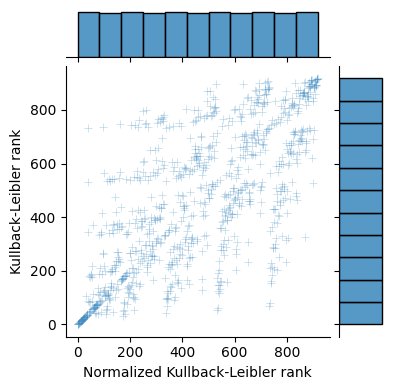

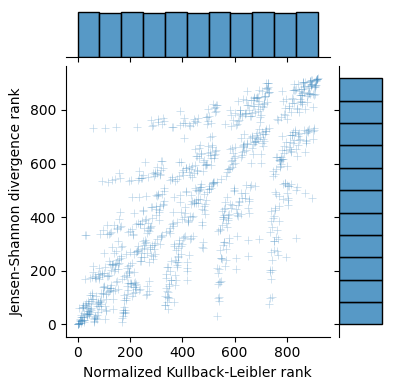

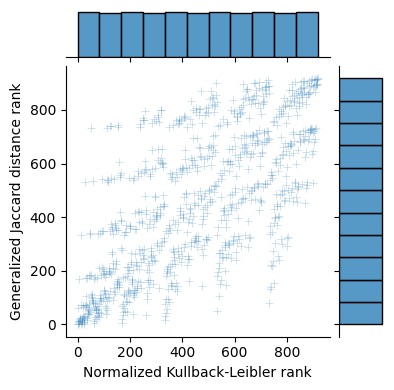

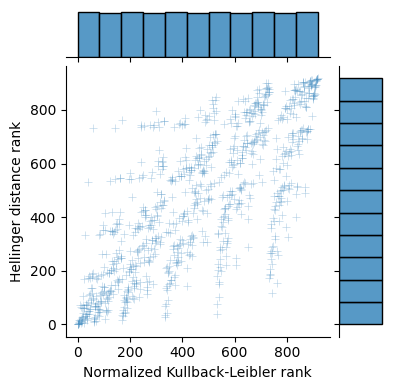

In [33]:
nk = list(df['Normalized Kullback-Leibler'])
o_nk = [ (nk[i], i) for i in range(len(nk)) ]
df['Normalized Kullback-Leibler rank'] = [ i[1] for i in sorted(o_nk)]

gj = list(df['Generalized Jaccard distance'])
o_gj = [ (gj[i], i) for i in range(len(gj)) ]
df['Generalized Jaccard distance rank'] = [ i[1] for i in sorted(o_gj)]

ukl = list(df['Kullback-Leibler'])
o_ukl = [ (ukl[i], i) for i in range(len(ukl)) ]
df['Kullback-Leibler rank'] = [ i[1] for i in sorted(o_ukl)]

jens = list(df['Jensen-Shannon divergence'])
o_jens = [ (jens[i], i) for i in range(len(jens)) ]
df['Jensen-Shannon divergence rank'] = [ i[1] for i in sorted(o_jens)]

hel = list(df['Hellinger distance'])
o_hel = [ (hel[i], i) for i in range(len(hel)) ]
df['Hellinger distance rank'] = [ i[1] for i in sorted(o_hel)]



sns.jointplot(x='Normalized Kullback-Leibler rank', y='Kullback-Leibler rank', data=df, kind='scatter', marker='+', alpha=0.3, height=4)#, xlim=(-0.1,1), ylim=(-0.1,1))
plt.savefig('rank_'+short_d['Normalized Kullback-Leibler'] +'_'+ short_d['Kullback-Leibler'] +'_'+ str(nof_dots) +'_'+ str(nof_cells)+'.png')

sns.jointplot(x='Normalized Kullback-Leibler rank', y='Jensen-Shannon divergence rank', data=df, kind='scatter', marker='+', alpha=0.3, height=4)#, xlim=(-0.1,1), ylim=(-0.1,1))
plt.savefig('rank_'+short_d['Normalized Kullback-Leibler'] +'_'+ short_d['Jensen-Shannon divergence'] +'_'+ str(nof_dots) +'_'+ str(nof_cells)+'.png')


sns.jointplot(x='Normalized Kullback-Leibler rank', y='Generalized Jaccard distance rank', data=df, kind='scatter', marker='+', alpha=0.3, height=4)#, xlim=(-0.1,1), ylim=(-0.1,1))
plt.savefig('rank_'+short_d['Normalized Kullback-Leibler'] +'_'+ short_d['Generalized Jaccard distance'] +'_'+ str(nof_dots) +'_'+ str(nof_cells)+'.png')


sns.jointplot(x='Normalized Kullback-Leibler rank', y='Hellinger distance rank', data=df, kind='scatter', marker='+', alpha=0.3, height=4)#, xlim=(-0.1,1), ylim=(-0.1,1))
plt.savefig('rank_'+short_d['Normalized Kullback-Leibler'] +'_'+ short_d['Hellinger distance'] +'_'+ str(nof_dots) +'_'+ str(nof_cells)+'.png')



    

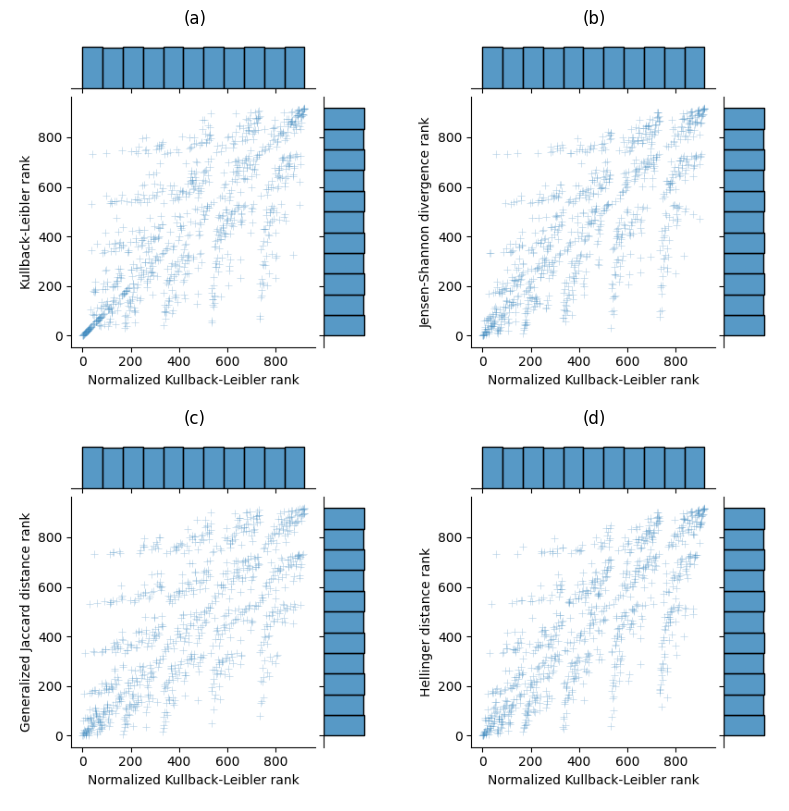

In [35]:
fig, axes = plt.subplots(2, 2,  figsize=(8,8), sharex=True, sharey=False, constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
axes[0,0].set_frame_on(False)
axes[0,1].set_frame_on(False)
axes[1,0].set_frame_on(False)
axes[1,1].set_frame_on(False)
axes[0,0].imshow(mpimg.imread('rank_nkl_kl_32_8.png'))
axes[0,1].imshow(mpimg.imread('rank_nkl_jsd_32_8.png'))
axes[1,0].imshow(mpimg.imread('rank_nkl_gjd_32_8.png'))
axes[1,1].imshow(mpimg.imread('rank_nkl_hel_32_8.png'))

axes[0,0].set_title('(a)')
axes[0,1].set_title('(b)')
axes[1,0].set_title('(c)')
axes[1,1].set_title('(d)')

plt.savefig('exp6.png', dpi=600)

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


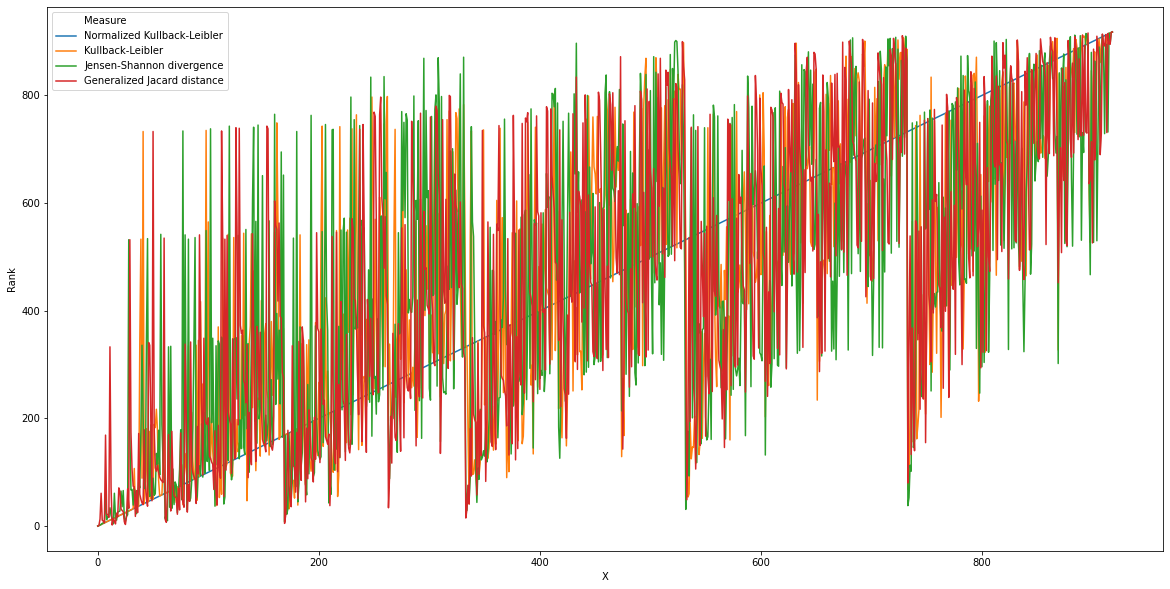

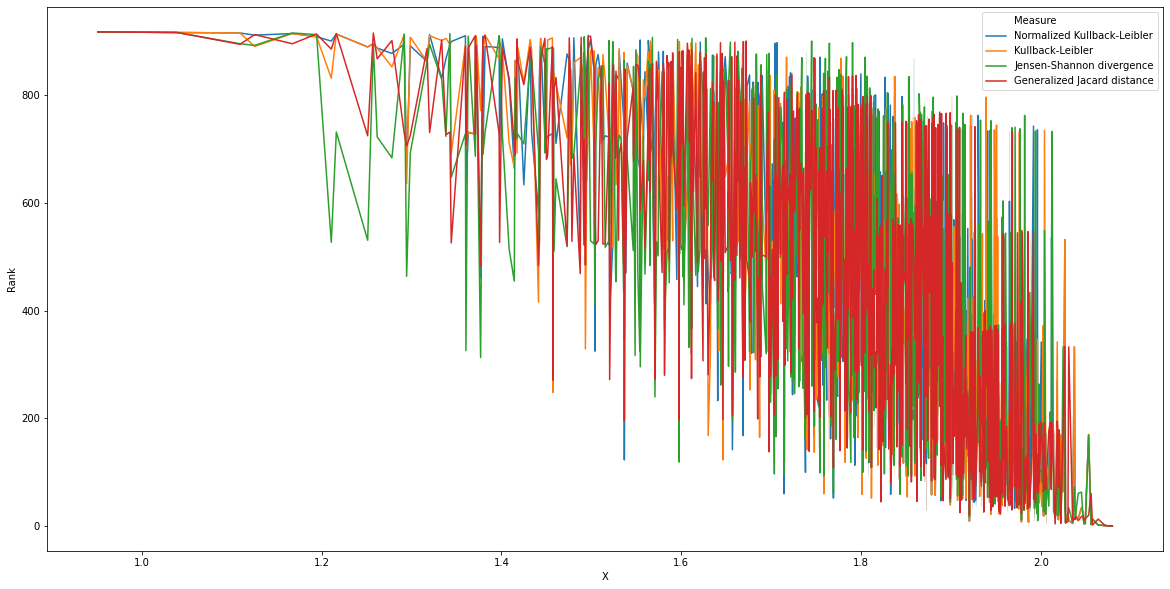

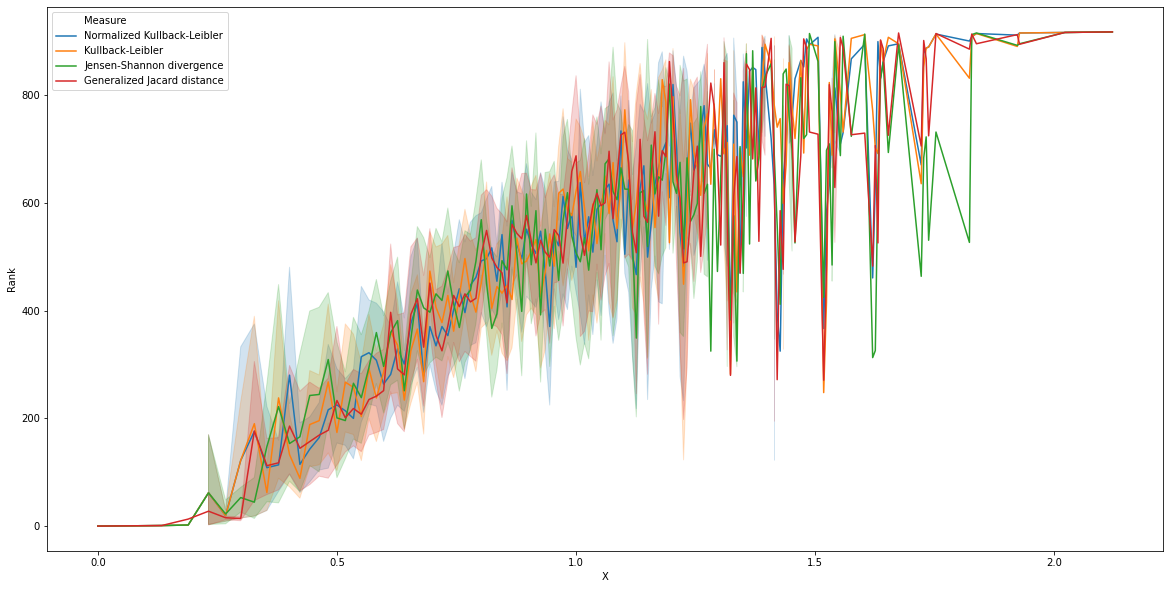

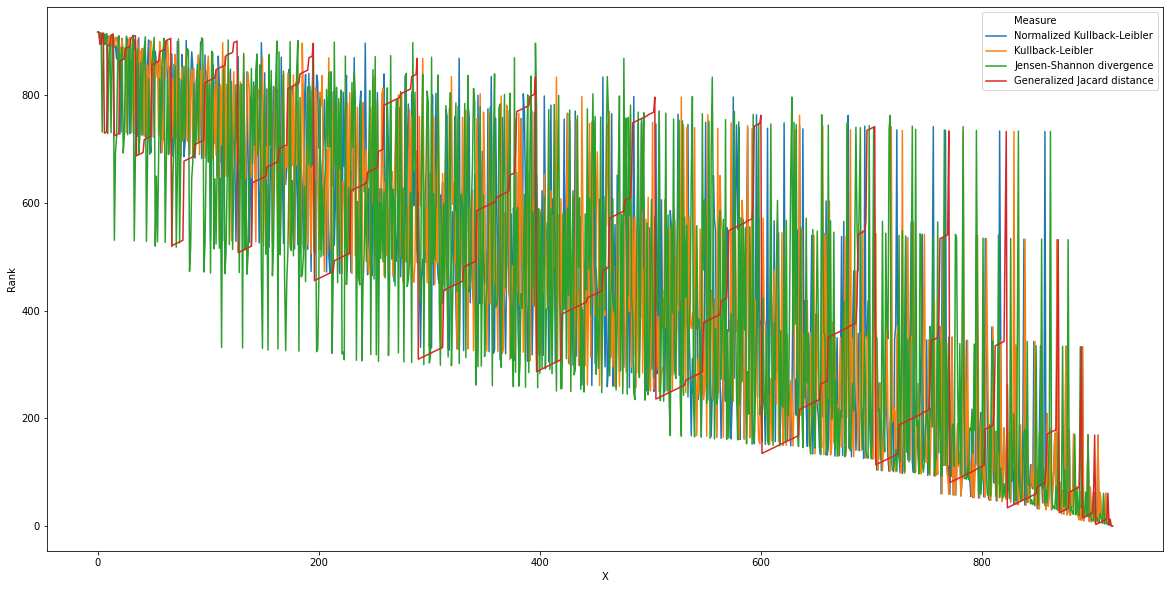

In [261]:
nk = list(df['Normalized Kullback-Leibler'])
o_nk = [ i[1] for i in sorted([ (nk[i], i) for i in range(len(nk)) ])]

gj = list(df['Generalized Jacard distance'])
o_gj = [ i[1] for i in sorted([ (gj[i], i) for i in range(len(gj)) ])]

ukl = list(df['Kullback-Leibler'])
o_ukl= [ i[1] for i in sorted([ (ukl[i], i) for i in range(len(ukl)) ])]

jens = list(df['Jensen-Shannon divergence'])
o_jens = [ i[1] for i in sorted([ (jens[i], i) for i in range(len(jens)) ])]


ldf = pandas.DataFrame()
#ldf['X'] = [i for i in range(len(o_gj))]*4

ldf['X'] = o_nk*4
ldf['Rank'] = o_nk + o_ukl + o_jens + o_gj 
ldf['Measure'] = ['Normalized Kullback-Leibler']*len(o_nk) + ['Kullback-Leibler']*len(o_ukl) + ['Jensen-Shannon divergence']*len(o_jens) +  ['Generalized Jacard distance']*len(o_gj)
dots = sns.load_dataset("dots").query("align == 'dots'")

display(dots)


fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=ldf, x='X', y='Rank', hue='Measure', ax=ax)




ldf['X'] = list(df['Entropy'])*4
dots = sns.load_dataset("dots").query("align == 'dots'")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=ldf, x='X', y='Rank', hue='Measure', ax=ax)


ldf['X'] = list(df['Coefficient of variation'])*4
dots = sns.load_dataset("dots").query("align == 'dots'")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=ldf, x='X', y='Rank', hue='Measure', ax=ax)


ldf['X'] = [i for i in range(len(o_gj))]*4
dots = sns.load_dataset("dots").query("align == 'dots'")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=ldf, x='X', y='Rank', hue='Measure', ax=ax)